In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

# membaca data .csv
df=pd.read_csv('/content/drive/MyDrive/Genetic_Algorithm/df_minmax.csv') 
display(df)

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5,0.016696,0.694596,1.0,0.000000,0.584459,0.930882
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5,0.015495,0.629661,1.0,0.000000,0.672297,0.963235
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5,0.013631,0.540427,1.0,0.306818,0.516892,0.630882
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5,0.029871,0.444491,1.0,0.147727,0.692568,0.819118
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5,0.061275,0.358609,1.0,0.375000,0.523649,0.598529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,0.654093,0.592593,0.2500,0.714286,0.325581,0.575758,0.813828,0.5,0.940713,0.788018,0.0,0.625000,0.415541,0.310294
577,0.661210,0.617284,0.3750,0.714286,0.328317,0.606061,0.845227,0.5,0.952397,0.837453,0.0,0.534091,0.429054,0.327941
578,0.669751,0.765432,0.8125,0.642857,0.336525,0.636364,0.875040,0.5,0.913494,0.949309,0.0,0.102273,0.000000,0.127941
579,0.686833,0.617284,0.4375,0.642857,0.344733,0.575758,0.904535,0.5,0.883167,1.000000,0.0,0.647727,0.300676,0.336765


In [17]:
# Menentukan data inputan
dfx = df.drop(['CL','CD','CM25','CYAW','CROLL','CY'], axis = 1)
#display(dfx)

In [18]:
# Menentukan data output atau target
dfy = df.drop(columns=['P0','Q0','T0','RHO','V0','ALFA','BETA', 'RE'])
#display(dfy)

In [19]:
# memisahkan data untuk train dan test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.01, random_state=None, shuffle=False)
print("X_train {}, X_test {}, y_train {}, y_test {}" .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train (575, 8), X_test (6, 8), y_train (575, 6), y_test (6, 6)


In [20]:
# Membuat model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(6) 
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
Total params: 318
Trainable params: 318
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Menentukan optimasi, parameter dan loss
opt = tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=0.0017)
model.compile(optimizer=opt, loss='mse', metrics=['mae','mse'])

In [22]:
# training model ANN
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.2365 - mae: 0.3663 - mse: 0.2365
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0851 - mae: 0.2274 - mse: 0.0851
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0829 - mae: 0.2260 - mse: 0.0829
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.2207 - mse: 0.0809
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0803 - mae: 0.2202 - mse: 0.0803
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0789 - mae: 0.2183 - mse: 0.0789
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0771 - mae: 0.2145 - mse: 0.0771
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0758 - mae: 0.2140 - mse: 0.0758
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0740 - mae: 0.2099 - mse: 0.0740
Epoch 10/100
18/18 [========

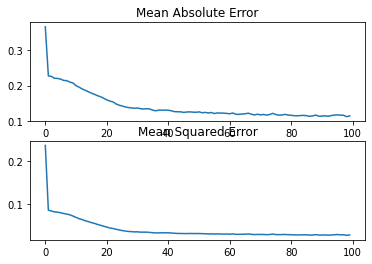

In [24]:
figure, axis = plt.subplots(2)
history_df = pd.DataFrame(history.history)
axis[0].plot(history_df['mae'])
axis[0].set_title("Mean Absolute Error")
axis[1].plot(history_df['mse'])
axis[1].set_title("Mean Squared Error")
plt.show()

In [23]:
# testing model ANN

y_pred=model.predict(X_test)

mae_8_feat = np.round(metrics.mean_absolute_error(y_test, y_pred),3)
mse_8_feat = np.round(metrics.mean_squared_error(y_test, y_pred),3)
rmse_8_feat = np.round(metrics.mean_squared_error(y_test, y_pred, squared=False),3)

print('Mean Absolute Error:', mae_8_feat)
print('Mean Squared Error:', mse_8_feat)
print('Root Mean Squared Error:', rmse_8_feat)

Mean Absolute Error: 0.137
Mean Squared Error: 0.036
Root Mean Squared Error: 0.165


# pengujian dengan 2 feature saja 

In [ ]:
# Menentukan data inputan
dfx = df.drop(['CL','CD','CM25','CYAW','CROLL','CY', 'Q0', 'RHO','V0','RE', 'P0', 'T0'], axis = 1)
display(dfx)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.01, random_state=None, shuffle=False)
print("X_train {}, X_test {}, y_train {}, y_test {}" .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train (575, 2), X_test (6, 2), y_train (575, 6), y_test (6, 6)


In [27]:
# Membuat model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(6) 
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Menentukan optimasi, parameter dan loss
opt = tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=0.0017)
model.compile(optimizer=opt, loss='mse', metrics=['mae','mse'])

In [29]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.1433 - mae: 0.3039 - mse: 0.1433
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0867 - mae: 0.2313 - mse: 0.0867
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0810 - mae: 0.2238 - mse: 0.0810
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0801 - mae: 0.2219 - mse: 0.0801
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0789 - mae: 0.2202 - mse: 0.0789
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0781 - mae: 0.2194 - mse: 0.0781
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0767 - mae: 0.2178 - mse: 0.0767
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0755 - mae: 0.2171 - mse: 0.0755
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0739 - mae: 0.2138 - mse: 0.0739
Epoch 10/100
18/18 [========

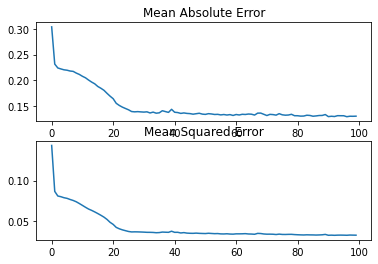

In [30]:
figure, axis = plt.subplots(2)
history_df = pd.DataFrame(history.history)
axis[0].plot(history_df['mae'])
axis[0].set_title("Mean Absolute Error")
axis[1].plot(history_df['mse'])
axis[1].set_title("Mean Squared Error")
plt.show()

In [31]:
y_pred=model.predict(X_test)

mae_2_feat = np.round(metrics.mean_absolute_error(y_test, y_pred),3)
mse_2_feat = np.round(metrics.mean_squared_error(y_test, y_pred),3)
rmse_2_feat = np.round(metrics.mean_squared_error(y_test, y_pred, squared=False),3)

print('Mean Absolute Error:', mae_2_feat)
print('Mean Squared Error:', mse_2_feat)
print('Root Mean Squared Error:', rmse_2_feat)

Mean Absolute Error: 0.202
Mean Squared Error: 0.058
Root Mean Squared Error: 0.227


In [39]:
print("Selisih hasil  8 feature dan 2 feature (MAE) : ", np.round((mae_2_feat - mae_8_feat),3))
print("Selisih hasil  8 feature dan 2 feature (MSE) : ", np.round((mse_2_feat - mse_8_feat),3))
print("Selisih hasil  8 feature dan 2 feature (RMSE) : ", np.round((rmse_2_feat - rmse_8_feat),3))

Selisih hasil  8 feature dan 2 feature (MAE) :  0.065
Selisih hasil  8 feature dan 2 feature (MSE) :  0.022
Selisih hasil  8 feature dan 2 feature (RMSE) :  0.062
